# Different Classifier (Supervised Learning) & Accuracy

## Author :- C Rangrajan Kumar


You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

1. k-Nearest Neighbour
2. Decision Tree
3. Support Vector Machine
4. Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

1. Jaccard index
2. F1-score
3. LogLoass

### Import some library

In [27]:
# Import the tools
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## About dataset

This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

 Field	Description
 Loan_status	Whether a loan is paid off on in collection
 Principal	Basic principal loan amount at the
 Terms	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
 Effective_date	When the loan got originated and took effects
 Due_date	Since it’s one-time payoff schedule, each loan has one single due date
 Age	Age of applicant
 Education	Education of applicant
 Gender	The gender of applicant

### Download the data

In [28]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-12-16 08:36:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 5.59M=0.004s

2020-12-16 08:36:05 (5.59 MB/s) - 'loan_train.csv' saved [23101/23101]



### Read the data into csv format

In [29]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [30]:
# Shape of the data
df.shape

(346, 10)

### Convert to date time object¶

In [31]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [32]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

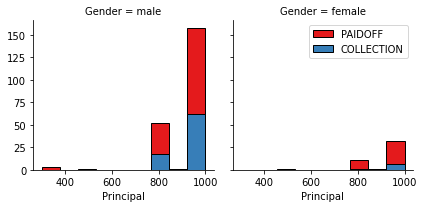

In [33]:
# PLOT MALE/FEMALE VS COUNT OF PAID
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

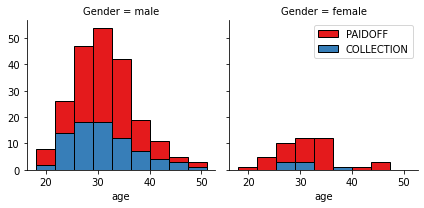

In [34]:
# m/f va age 
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

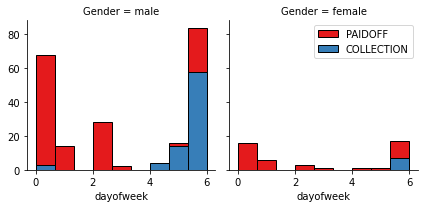

In [35]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction

In [36]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


##  Convert Categorical features to numerical values

In [37]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [38]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

In [39]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [40]:
# Feature befor One Hot Encoding
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [41]:
# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature selection

In [42]:
X = Feature
X[0:6]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
5,1000,30,36,0,1,0,0,1


In [43]:
y = df['loan_status'].values
y[0:6]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

(array([[7., 0., 0., ..., 0., 0., 1.],
        [7., 0., 0., ..., 0., 0., 1.],
        [7., 0., 0., ..., 0., 0., 1.],
        ...,
        [7., 0., 0., ..., 0., 1., 0.],
        [7., 0., 0., ..., 0., 0., 1.],
        [7., 0., 0., ..., 0., 0., 1.]]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 346 Lists of Patches objects>)

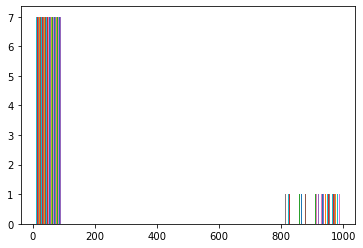

In [44]:
plt.hist(X)

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [45]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:6]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769,  0.8391575 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

(array([[  3.,   2.,   0.,   0.,  81.,   2., 258.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  14., 148.,   0., 184.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  26., 108., 124.,  57.,  24.,   7.],
        [  0.,   0.,   0.,   0.,   0., 294.,   0.,   0.,  52.,   0.],
        [  0.,   0.,   0.,   0.,   0., 141.,   0., 205.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 302.,   0.,   0.,   0.,  44.],
        [  0.,   0.,   0.,   0.,   0., 195.,   0., 151.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 197.,   0., 149.,   0.,   0.]]),
 array([-5.89052444, -4.96882824, -4.04713204, -3.12543584, -2.20373963,
        -1.28204343, -0.36034723,  0.56134897,  1.48304517,  2.40474138,
         3.32643758]),
 <a list of 8 Lists of Patches objects>)

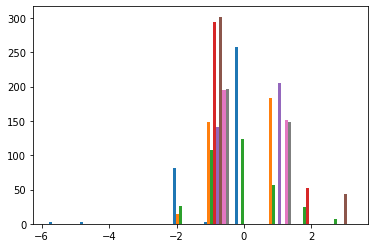

In [46]:
plt.hist(X)

## Classification Technique


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

1. K Nearest Neighbor(KNN)
2. Decision Tree
3. Support Vector Machine
4. Logistic Regression

Notice:

    You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
    You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
    You should include the code of the algorithm in the following cells.

In [47]:
# Splitting Dataset into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [48]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [49]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

k = 1 has a Score = 0.6428571428571429 
k = 2 has a Score = 0.5571428571428572 
k = 3 has a Score = 0.7142857142857143 
k = 4 has a Score = 0.6285714285714286 
k = 5 has a Score = 0.7571428571428571 
k = 6 has a Score = 0.6571428571428571 
k = 7 has a Score = 0.7571428571428571 
k = 8 has a Score = 0.7142857142857143 
k = 9 has a Score = 0.7 


Text(0, 0.5, 'Testing Accuracy Values')

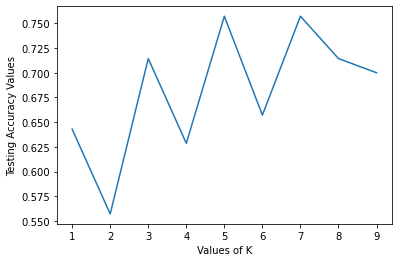

In [50]:
# Relation between k's and their respective accuracies

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [51]:
# Final Model with best value of k

knn_model = knn(n_neighbors = 7)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

knn_model

KNeighborsClassifier(n_neighbors=7)

In [55]:
# Evaluation Metrices
from sklearn.metrics import jaccard_score, f1_score, log_loss

## Decision Tree 


In [56]:
# Libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [63]:
depth_range = range(1, 10)
jaccard_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    pos_label = np.array(['COLLECTION', 'PAIDOFF'], dtype='<U10')
    jaccard_score_.append(jaccard_score(y_test, dt_yhat, pos_label = "PAIDOFF"))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

In [64]:

# Creating a df to check the best value of max_depth

result = pd.DataFrame([jaccard_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.828571,0.828571,0.800000,0.695652,0.637681,0.666667,0.701493,0.712121,0.731343
F1,0.750893,0.750893,0.736508,0.694760,0.657958,0.676571,0.722768,0.740048,0.742857


In [65]:

# Main Model

dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(max_depth=2)

## Support Vector Machine

In [67]:
# Libraries
from sklearn.svm import SVC 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_yhat = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svc_yhat, average = 'weighted'))

Text(0, 0.5, 'Accuracy')

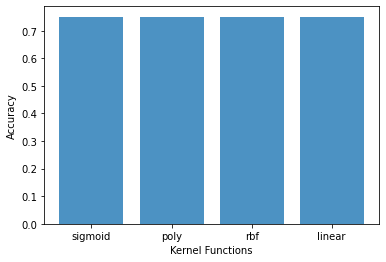

In [69]:
# Visualization of best kernel

y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha = 0.8)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [70]:

svc_model = SVC(C = 0.01, gamma = 'auto', kernel = 'poly')
svc_model.fit(X_train, y_train)
svc_model

SVC(C=0.01, gamma='auto', kernel='poly')

## Logistic Regression

In [71]:
# Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.4343730868201016
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.4343747354425674
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.4549507341538283
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.43437272447873787
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.4343753114973547


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.4529024775789561
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.45290317337466335
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5596633457155463
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.4529024348154771
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.45291412692739696


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.4787024545768455
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.4787029264114973
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6685399066061889
Test 14: Accuracy at C = 0.00

Text(0, 0.5, 'Testing Accuracy')

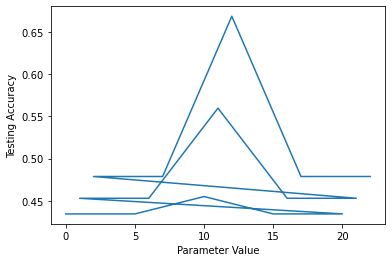

In [73]:
# Visualization

lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [74]:

# Main Model

from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, solver='liblinear')

## Model Evaluation using Test set

In [76]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [77]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-16 08:54:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 13.2M=0s

2020-12-16 08:54:22 (13.2 MB/s) - 'loan_test.csv' saved [3642/3642]



In [78]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [79]:

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)

# Testing feature
X_loan_test = test_feature

# Normalizing Test Data
X_loan_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)

# Target result
y_loan_test = test_df['loan_status'].values

In [80]:
print (X_loan_test[0:5])
print (X_loan_test.shape)

print (y_loan_test[0:5])
print (y_loan_test.shape)

[[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
(54, 8)
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
(54,)


In [84]:
# Jaccard
from sklearn.metrics import jaccard_score

# KNN
knn_yhat = knn_model.predict(X_loan_test)
pos_label = np.array(['COLLECTION', 'PAIDOFF'], dtype='<U10')
jss1 = round(jaccard_score(y_loan_test, knn_yhat, pos_label = "PAIDOFF"), 2)

# Decision Tree
dt_yhat = dt_model.predict(X_loan_test)
pos_label = np.array(['COLLECTION', 'PAIDOFF'], dtype='<U10')
jss2 = round(jaccard_score(y_loan_test, dt_yhat, pos_label = "PAIDOFF"), 2)

# Support Vector Machine
svc_yhat = svc_model.predict(X_loan_test)
pos_label = np.array(['COLLECTION', 'PAIDOFF'], dtype='<U10')
jss3 = round(jaccard_score(y_loan_test, svc_yhat, pos_label = "PAIDOFF"), 2)

# Logistic Regression
lr_yhat = lr_model.predict(X_loan_test)
pos_label = np.array(['COLLECTION', 'PAIDOFF'], dtype='<U10')
jss4 = round(jaccard_score(y_loan_test, lr_yhat, pos_label = "PAIDOFF"), 2)

jss_list = [jss1, jss2, jss3, jss4]
jss_list

[0.69, 0.74, 0.74, 0.76]

In [85]:
# F1_score
from sklearn.metrics import f1_score

# KNN
knn_yhat = knn_model.predict(X_loan_test)
f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = dt_model.predict(X_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)

# Support Vector Machine
svc_yhat = svc_model.predict(X_loan_test)
f3 = round(f1_score(y_loan_test, svc_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = lr_model.predict(X_loan_test)
f4 = round(f1_score(y_loan_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2, f3, f4]
f1_list

[0.71, 0.63, 0.63, 0.76]

In [86]:
# log loss
from sklearn.metrics import log_loss

# Logistic Regression
lr_prob = lr_model.predict_proba(X_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.67]

In [87]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

In [88]:
accuracy_df = pd.DataFrame([jss_list, f1_list, ll_list], index = index, columns = columns)

In [89]:

accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.69,0.71,NA
Decision Tree,0.74,0.63,NA
SVM,0.74,0.63,NA
Logistic Regression,0.76,0.76,0.67


# Thank You